# Group 11

## Iben Mai Huse, Karlis Buiko, Markus Sibbesen, Ida Kathrine Jensen

This notebook contains the code for data exploration, and will be the hand-in for the First Year Project 4

Created 04.05.2021

Last modified, modified by:

04.05.2021, Ida

### Imports

In [1]:
import pandas as pd 
import csv 
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
from difflib import ndiff
from collections import Counter
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Path to files

In [2]:
# For hate speech detection
hate_train = open("datasets/hate/train_text.txt", "r", encoding="utf-8").read()
hate_test = open("datasets/hate/test_text.txt", "r", encoding="utf-8").read()
hate_mapping = open("datasets/hate/mapping.txt", "r", encoding="utf-8").read()

# For sentiment analysis
sentiment_train = open("datasets/sentiment/train_text.txt", "r", encoding="utf-8").read()
sentiment_test = open("datasets/sentiment/test_text.txt", "r", encoding="utf-8").read()
sentiment_mapping = open("datasets/sentiment/mapping.txt", "r", encoding="utf-8").read()

## Task 1: Preprocessing

#### We have selected *hate speech detection* as the binary classifier and the *sentiment analysis* as the multiclass classifier.

*Using regular expressions, implement a tokeniser to split the input texts into meaningful tokens. Your tokeniser should be a script that takes as input the data as distributed in the dataset and outputs the tokenised text, one output line per input line, with spaces between tokens.*

*• Use the training set of one of the tasks you’ve chosen to work on. Set aside a part of the training set for evaluating the tokeniser so you don’t have to touch the validation data for that.*

In [3]:
hate_train_lists = hate_train.split('\n')
hate_train_tokenize = hate_train_lists[0:4500]
hate_train_set_aside = hate_train_lists[4500:-1]

*• Start by taking a subset of the trainingdata, look through it and discuss in your group what a good tokenisation of this subset should look like. Then design your initial Python implementation to match this ideal tokenisation, and run it over the portion of the training set that you didn’t hold out for tokeniser evaluation. Keep an eye on infrequently occurring tokens in the output that look like tokenisation errors.*

In [4]:
def tokenize_line(line):
    #replacements = ".,:;?!/#%\(\)@$\-…"
    #temp = re.sub(f'([^ ])([{replacements}])', r'\1 \2', line)
    #temp = re.sub(f'([{replacements}])([^ ])', r'\1 \2', temp)
    temp = re.sub(f'([a-zA-Z])([^a-zA-Z ])', r'\1 \2', line)
    temp = re.sub(f'([^a-zA-Z @#])([a-zA-Z])', r'\1 \2', temp)
    return temp

tokenize_line('hej, d/et.te (er) en .test!')

'hej , d / et . te ( er ) en . test !'

*• Once you’re done, compare your tokeniser’s output with the baseline tokenisation
you get from the social media tokeniser in the NLTK library (nltk.tokenize.TweetTokenizer), using the data you’ve set aside for this purpose.*

In [5]:
#TweetTokenizer(hate_train)
tknzr = TweetTokenizer()
tokens_homemade = [tokenize_line(hate_train_tokenize[i].strip()) for i in range(20)]
tokens_nltk = [' '.join(tknzr.tokenize(hate_train_tokenize[i])) for i in range(20)]
print(tokens_homemade)
print(tokens_nltk)

['@user nice new signage . Are you not concerned by Beatlemania - style hysterical crowds crongregating on you …', 'A woman who you fucked multiple times saying yo dick small is a compliment you know u hit that spot 😎', '@user @user real talk do you have eyes or were they gouged out by a rapefugee ?', 'your girlfriend lookin at me like a groupie in this bitch !', 'Hysterical woman like @user', 'Me flirting - So tell me about your father ...', 'The Philippine Catholic bishops \' work for migrant workers should focus on families who are " paying the great ...', "I AM NOT GOING AFTER YOUR EX BF YOU LIEING SACK OF SHIT ! I ' m done with you dude that ' s why I dumped your ass cause your a lieing 😂😡 bitch", 'When cuffin season is finally over', 'Send home migrants not in need of protection , Peter Dutton tells UN , HEY DUTTON HOW ABOUT THE ONES THAT HAVE STAYED AND NOT LEFT THE COUNTRY WHEN THEY SHOULD OVERSTAYERS ? WHY DONT YOU GO AND ROUND ALL THEM UP ?', 'Cory Booker and Kamala Harris co

*
• Consider using the difflib package in Python, or the diff utility in the Unix shell, to compare the output of the two tokenisers efficiently.*

In [6]:
[i for i in ndiff(tokens_homemade, tokens_nltk)]

['  @user nice new signage . Are you not concerned by Beatlemania - style hysterical crowds crongregating on you …',
 '  A woman who you fucked multiple times saying yo dick small is a compliment you know u hit that spot 😎',
 '  @user @user real talk do you have eyes or were they gouged out by a rapefugee ?',
 '  your girlfriend lookin at me like a groupie in this bitch !',
 '  Hysterical woman like @user',
 '  Me flirting - So tell me about your father ...',
 '  The Philippine Catholic bishops \' work for migrant workers should focus on families who are " paying the great ...',
 "- I AM NOT GOING AFTER YOUR EX BF YOU LIEING SACK OF SHIT ! I ' m done with you dude that ' s why I dumped your ass cause your a lieing 😂😡 bitch",
 '?                                                            - -                         - -\n',
 "+ I AM NOT GOING AFTER YOUR EX BF YOU LIEING SACK OF SHIT ! I'm done with you dude that's why I dumped your ass cause your a lieing 😂 😡 bitch",
 '?                 

## Task 2: Characterising Your Data

In [7]:
df_hate = pd.DataFrame()
df_hate['raw'] = hate_train_lists
df_hate['tokenized'] = df_hate['raw'].apply(tknzr.tokenize)

df_sentiment = pd.DataFrame()
df_sentiment['raw'] = sentiment_train.split('\n')
df_sentiment['tokenized'] = df_sentiment['raw'].apply(tknzr.tokenize)

*Characterise the training sets of the two tasks you’ve chosen in terms of elementary corpus statistics: <br>
• Corpus size, vocabulary size, type/token ratio.*

In [8]:
# Corpus size:
print('Corpus size for hate: ',len(df_hate))
print('Corpus size for sentiment: ', len(df_sentiment))

Corpus size for hate:  9001
Corpus size for sentiment:  45616


In [9]:
tokens_sentiment = list(df_sentiment['tokenized'][:9001])
tokens_sentiment = sum(tokens_sentiment, [])

In [10]:
tokens_sentiment2 = list(df_sentiment['tokenized'][9001:18000])
tokens_sentiment2 = sum(tokens_sentiment2, [])

In [11]:
tokens_sentiment3 = list(df_sentiment['tokenized'][18000:27000])
tokens_sentiment3 = sum(tokens_sentiment3, [])

In [12]:
tokens_sentiment4 = list(df_sentiment['tokenized'][27000:36000])
tokens_sentiment4 = sum(tokens_sentiment4, [])

In [13]:
tokens_sentiment5 = list(df_sentiment['tokenized'][36000:])
tokens_sentiment5 = sum(tokens_sentiment5, [])

In [14]:
tokens_sentiment_full = tokens_sentiment + tokens_sentiment2 + tokens_sentiment3 + tokens_sentiment4 + tokens_sentiment5

In [15]:
tokens_sentiment_list = sorted(Counter(tokens_sentiment_full).items(), key=lambda x: x[1], reverse=True)

print('Vocabulary size for sentiment: ', len(tokens_sentiment_list))

Vocabulary size for sentiment:  62251


In [17]:
# Vocabulary size:
tokens_hate = list(df_hate['tokenized'])
tokens_hate = sum(tokens_hate, [])
tokens_hate_list = sorted(Counter(tokens_hate).items(), key=lambda x: x[1], reverse=True)

print('Vocabulary size for hate: ',len(tokens_hate_list))


Vocabulary size for hate:  23483


Vocab size for hate:  23483 , Corpus size for hate:  9001

Vocabulary size for sentiment:  62251   , Corpus size for sentiment:  45616


In [29]:
# Type/ token ratio: Number of unique tokens / total number of tokens 
print(f'Type/token ratio for hate: {len(tokens_hate_list) / len(tokens_hate)}')
print(f'Type/token ratio for sentiment: {len(tokens_sentiment_list) / len(tokens_sentiment_full)}')

Type/token ratio for hate: 0.11005764634203496
Type/token ratio for sentiment: 0.06027681379459929


• *What are the most frequent tokens?*

In [19]:
tokens_hate_list[:30]
# maye decapitalize some words and then count. 

[('.', 6257),
 ('@user', 6014),
 ('the', 4788),
 ('to', 4606),
 (',', 4356),
 ('a', 3677),
 ('and', 2995),
 ('you', 2823),
 ('of', 2797),
 ('in', 2384),
 ('!', 2147),
 ('is', 1930),
 ('for', 1739),
 ('I', 1606),
 ('are', 1502),
 ('?', 1353),
 ('that', 1298),
 ("'", 1250),
 ('on', 1135),
 ('not', 1089),
 ('’', 966),
 ('-', 943),
 ('it', 907),
 ('be', 894),
 ('your', 890),
 ('with', 889),
 ('...', 874),
 ('bitch', 873),
 ('all', 864),
 (':', 833)]

In [20]:
tokens_sentiment_list[:30]

[('the', 34863),
 ('.', 32569),
 ('"', 29124),
 ('to', 20647),
 (',', 17627),
 ('@user', 16830),
 ('!', 16090),
 ('in', 13096),
 ('on', 12551),
 ('a', 12192),
 ('I', 12161),
 ('and', 12008),
 ('of', 10676),
 ('\\', 10614),
 ('for', 9667),
 ('is', 9267),
 ('...', 8429),
 ('you', 7426),
 ('with', 7350),
 ('?', 7095),
 ('be', 7092),
 ('at', 6893),
 ('tomorrow', 6557),
 ('it', 6385),
 (':', 6345),
 ('may', 5618),
 ('u002c', 4466),
 ('that', 4334),
 ('have', 4185),
 ('-', 4159)]

• *What types of tokens occur only once, or 2 or 3 times?*

In [21]:
tokens_hate_df = pd.DataFrame(tokens_hate_list)
tokens_sentiment_df = pd.DataFrame(tokens_sentiment_list)


In [22]:
# The amount of 2nd and 3rd most poluar for hate and sentiment
twos_thress_hate = tokens_hate_df.loc[(tokens_hate_df[1] == 2) | (tokens_hate_df[1] == 3)] 

twos_thress_sentiment = tokens_sentiment_df.loc[(tokens_sentiment_df[1] == 2) | (tokens_sentiment_df[1] == 3)]  


• *Are there any noticeable differences between your two datasets?*<br>

In [23]:
## one is way bigger than the other
## the hate one has a lot more politics

• *Are the corpus statistics consistent with Zipf’slaw?(no formal test needed,but a plot would be helpful)*<br>

Text(0.5, 1.0, "Zipf's Law for Hate data")

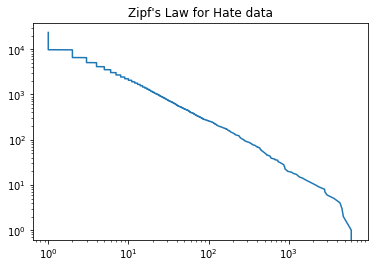

In [24]:
# zipfs law for hate
tokens_hate_df['rank'] = range(len(tokens_hate_list))
plt.plot(tokens_hate_df[1], tokens_hate_df['rank'])
plt.yscale('log')
plt.xscale('log')
plt.title("Zipf's Law for Hate data")

Text(0.5, 1.0, "Zipf's law on Sentiment data")

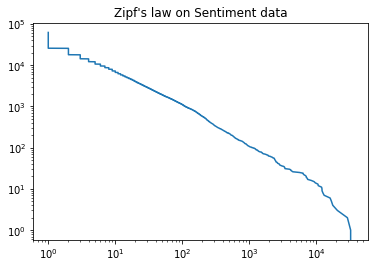

In [25]:
tokens_sentiment_df['rank'] = range(len(tokens_sentiment_list))
plt.plot(tokens_sentiment_df[1], tokens_sentiment_df['rank'])
plt.yscale('log')
plt.xscale('log')
plt.title("Zipf's law on Sentiment data")

## Task 3: Manual Annotation and Inter-Annotator Agreement

*Choose one of your two datasets. For this subtask, the emoji prediction dataset doesn’t make sense, so if that is one of your choices, pick the other one for this part of the assignment.*

Our choice of dataset: "Hate"

*In the README file in the TweetEval corpus repository, there are links to research papers from the SemEval workshop, describing how each of the datasets was created and annot- ated. Locate the one that belongs to the dataset you’ve picked for this subtask and find the passages that describe in detail how the labels for the dataset were created. Read these passages carefully.*

*Next, select a random sample of 100 tweets from the training set. Working independently from each other and without consulting the labels published in the TweetEval corpus, each member of your group should now go manually through this sample and label them according to the same scheme.*

In [47]:
Karlis_hate = [0] + open("iaa/KarlisHateOrNot.txt", "r", encoding="utf-8").read().split('\n')
Iben_hate = [0] + open("iaa/iben_map.txt", "r", encoding="utf-8").read().split('\n')
Markus_hate = [0] + open("iaa/iaa_labels_markus.txt", "r", encoding="utf-8").read().split('\n')
Ida_hate = [0] + open("iaa/LabelsHateIda.txt", "r", encoding="utf-8").read().split('\n')
correct_hate = [0] + open("iaa/iaa_labels.txt", "r", encoding="utf-8").read().split('\n')
Hate_labels = pd.DataFrame(list(zip(Karlis_hate,Iben_hate,Markus_hate,Ida_hate, correct_hate)), columns =['Karlis', 'Iben',"Markus","Ida", "Answers"])

In [65]:
for i in ['Karlis', 'Iben',"Markus","Ida", "Answers"]:
    Hate_labels[i] = Hate_labels[i].astype('int')

In [104]:
Hate_labels

,Karlis,Iben,Markus,Ida,Answers
0,0,0,0,0,0
1,1,1,1,1,1
2,0,0,0,0,0
3,1,0,0,0,0
4,1,1,1,1,1
...,...,...,...,...,...
116,1,0,1,1,0
117,0,0,1,1,1
118,1,1,0,1,1
119,0,0,0,0,0


*Report on the inter-annotator agreement, including the agreement with the published labels, and discuss what phenomena in the data caused the biggest problems for inter-annotator agreement.*

0       True
1      False
2       True
3      False
4      False
       ...  
116    False
117     True
118    False
119     True
120    False
Length: 121, dtype: bool

In [102]:
n = 121
agree_1 = Hate_labels['Karlis'] & Hate_labels['Iben']  & Hate_labels['Markus']  & Hate_labels['Ida'] & Hate_labels['Answers']
agree_0 = (Hate_labels['Karlis'] == 0) & (Hate_labels['Iben'] == 0)  & (Hate_labels['Markus'] == 0)  & (Hate_labels['Ida'] == 0) & (Hate_labels['Answers'] == 0)
A_0 = sum(agree_1)/n + sum(agree_0)/n
print(A_0)
# expected agreement cohens kappa
columns = ['Karlis', 'Iben',"Markus","Ida", 'Answers']
k_is_1 = 1
for i in columns:
    k_is_1 = k_is_1 * (sum(Hate_labels[i])/n)
k_is_0 = 1
for i in columns:
    k_is_0 = k_is_0 * ((121 - sum(Hate_labels[i]))/n)

A_e = k_is_0 + k_is_1

agree_factor = (A_0 - A_e)/(1 - A_e)
agree_factor

0.4462809917355372


0.38440168274602066

*What phenomena in the data caused the biggest problems for inter-annotator agreement?*

ANSWER: 
- Sensitive (often political) subjects, but not hate which gave us a diversity of labels.  
- explicit language, but not hate

Agreement was mostly on misogyny and disagreement on xenophobia
- It was difficult to tell if the tweet was hateful xenophobia or just a political position.
- Whereas, there were less political positions on women and just outright hate. 

Sometime, there was hateful speech but not about the selected topics which confused us. 
We did not know if a simple hastag like #buildthatwall is hate speech but it seemed like it is.

Incidents of no hate speech but the citation had hate speech in them, this also confused us.

## Task 4: Automatic Prediction

*Finally, use scikit-learn to train a classifier for the automatic prediction of the labels in the two datasets you have chosen. During the lessons, we have not had time to discuss machine learning techniques and classification methods in detail, so in this exercise you will be using library implementations as “black box” methods.* <br>

*Run all classification experiments on both of the tasks you’ve chosen (one binary and one multi-class task). Evaluate your different classifiers on the validation set and report relevant evaluation metrics (accuracy, precision/recall/F-score).* <br>

*As a baseline, start with the sklearn.linear_model.SGDClassifier in a logistic regression configuration (loss=’log’) using bag of words features. Then run at least additional experiments trying to improve your initial scores by any means you can think of. Try out at least 4 different methods. Usually you will need to run several experiments for each methods to test different parameter values. Here are some settings in scikit-learn that you could experiment with:*

*• Count transformations (sklearn.feature_extraction.text.TfIdfTransformer).* <br>


*• The classification loss(lossparametertoSGDClassifier).* <br>


• The regularisation strength (alpha parameter to SGDClassifier – try varying it in
exponentially spaced steps).

• Different classifiers (e.g., sklearn.ensemble.RandomForestClassifier or
sklearn.naive_bayes.MultinomialNB.

• Anything else discussed during the lessons, or implemented in scikit-learn.


*(For the systems that achieves the highest accuracy on the validation set, run the evaluation on the test set and report your results. We will share an anonymous overview of the test set scores of all groups after the reports are handed in.)*

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5235cf77-d347-437f-a336-60ef81766ce7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>